# Estructuras de datos avanzadas

Ademas de permitir representar agrupaciones de datos, tambien permiten expresar **relaciones estre datos**

- **Nodo**: unidad que contiene datos y es identificado mediante una *key*
    - Un nodo contiene 0 o mas referencias a otros nodos - sus nodos vecinos con los que mantiene una relacion

Conjuntos de nodos nos permite expresar estructuras de datos mas complejas

# 1. Listas Ligadas

- Estructura que almacena nodos en orden *secuencial* (listas, stacks, colas)
- Cada nodo posee una referencia a su **unico sucesor**
- **Nodo Cabeza**: primer nodo de la lista
- **Nodo Cola**: ultimo nodo de la lista, no posee sucesor

## Implementacion. clase `Nodo` y clase `ListaLigada`

Modelacion generica de un Nodo. Posee su valor interno, y una referencia al siguente `Nodo`

In [2]:
class Nodo:
    """
    Nodo de una lista ligada
    """
    def __init__(self, valor=None):
        self.valor = valor
        self.siguente = None # Cuando se crea un nodo
                             # la referencia al sgte comienza vacia

Modelacion de la Lista Ligada. Posee un Nodo Cabeza y un Nodo Cola

In [3]:
class ListaLigada:
    """
    Clase que representa a una lista ligada
    """

    def __init__(self) -> None:
        # inicializacion de una lista ligada vacia
        self.cabeza: Nodo = None
        self.cola: Nodo = None

### ¿Como recorrer la lista ligada? Metodos de la clase `ListaLigada`

#### `def agregar(valor)`

- Este metodo agrega un nodo con valor `valor` al final de la lista. Se convierte en el Nodo Cola de esta
- Funcionamiento similar a `append`
    1. Crear nodo nuevo con valor dado 
    2. Al nodo Cola actual -> asignarle el nuevo nodo como sucesor
    3. Asignar a nuestro nodo como nuevo nodo cola de la lista

#### `def obtener(posicion)`

- Este metodo recupera el valor almacenado en `posicion`.
- Notar que no existe el *acceso indexado* es la lista ligada. Se debe recorrer cada nodo hasta llegar a la posicion que queremos.
    - Se parte desde la cabeza, accediendo a `nodo.siguente` para ver el siguente nodo

#### `def insertar(valor, posicion)`

- Este metodo crea un Nodo con el valor `valor` y en la posicion `posicion` de la lista ligada
    1. Crear el nodo nuevo
    
    2. Buscar el nodo en la posicion donde se quiere insertar ($n_{aft}$). Este nodo quedara 'despues' del nuevo nodo despues de la insercion
    
    3. Buscar el nodo anterior a la posicion donde se quiere insertar ($n_{pre}$). Este nodo quedara 'antes' del nuevo nodo despues de la insercion

    4. Asignar el nuevo nodo $n_{pre}$`.siguente`

    5. Asignar $n_{aft}$ al siguente del nuevo nodo

### `ListaLigada` full implementada

In [2]:
class ListaLigada:
    """
    Clase que representa a una lista ligada
    """

    def __init__(self) -> None:
        # inicializacion de una lista ligada vacia
        self.cabeza: Nodo = None
        self.cola: Nodo = None

    def agregar(self, valor):
        """
        Agrega un nodo al final de la lista
        """
        
        # crear nuevo nodo
        nodo = Nodo(valor=valor)

        # si la lista esta vacia
        if self.cabeza is None: # se convierte en nuestro unico nodo
            self.cabeza = nodo
            self.cola = nodo
        else: # 
            self.cola.siguente = nodo # asigmamos el sucesor de la cola
            self.cola = self.cola.siguente # asignamos la nueva cola

    def obtener(self, posicion):
        """
        Recupera el Nodo en la posicion indicada. Parte desde el comienzo
        """

        # comenzamos por la cabeza
        nodo_actual = self.cabeza

        # recorremos siguendo los punteros al nodo siguente
        for _ in range(posicion):
            if nodo_actual is not None: # si no se llego al final de la lista
                nodo_actual = nodo_actual.siguente # accedemos al siguente nodo

        # en este punto, se esta buscando una posicion mayor a la longitud de la lista ligada
        if nodo_actual is None:
            return None # retornamos nada
        
        # retornamos el valor del nodo que queriamos consultar, cuyo Nodo fue asignado en el for
        # si es que se encontraba ahi
        return nodo_actual.valor
        
    def insertar(self, valor, posicion):
        """
        Crea un nodo y lo inserta en la posicion indicada
        """

        nodo = Nodo(valor=valor)
        nodo_actual = self.cabeza


        # caso base: insertar en la cabeza
        if posicion == 0:
            nodo.siguente = self.cabeza # lo colocamos antes de la cabeza
            self.cabeza = nodo # asignamos la nueva cabeza

            # si la lista estaba vacia, actualizar la cola
            if nodo.siguente is None:
                self.cola = nodo

            return # finalizar ejecucion
        
        # buscar el nodo predecesor
        for _ in range(posicion - 1):
            if nodo_actual is not None:
                nodo_actual = nodo_actual.siguente

        # se halla al predecesor, se actualizan sus referencias
        if nodo_actual is not None:
            # colocamos el que estaba al siguente del predecesor (el sucesor)
            # y lo asignamos como el siguente de nuestro nodo nuevo
            nodo.siguente = nodo_actual.siguente
            
            # colocamos nuestro nodo despues del predecesor
            nodo_actual.siguente = nodo
            
            # si se inserto en la ultima posicion
            if nodo.siguente is None:
                self.cola = nodo

    def __repr__(self) -> str:
        """
        Representacion de la lista ligada
        """
        string = ""
        nodo_actual = self.cabeza
        while nodo_actual is not None:
            string += f'{nodo_actual.valor} -> '
            nodo_actual = nodo_actual.siguente

        return string

    # metodos extras de los ejercicios
    def __len__(self):
        '''
        Retorna el largo de las lista ligada
        '''
        nodo_actual = self.cabeza
        if nodo_actual is None: # lista vacia
            return 0
        
        curr_len = 0
        while nodo_actual is not None:
            nodo_actual = nodo_actual.siguiente
            curr_len += 1

        return curr_len

    def remover(self, posicion):
        """
        Remueve un nodo de la posicion indicada, lo desecha despues de utilizarlo
        """
        nodo_actual = self.cabeza
        # caso base: quitar la cabeza
        if posicion == 0:
            nueva_cabeza = self.cabeza.siguiente
            self.cabeza = nueva_cabeza
            del nodo_actual
            return

        # recorremos la lista hasta llegar al predecesor
        for _ in range(posicion -1):
            if nodo_actual is not None:
                nodo_actual = nodo_actual.siguiente

        # tenemos el predecesor
        if nodo_actual is not None:
        
            # tenemos el sucedor de este, el nodo que queremos eliminar
            nodo_a_remover = nodo_actual.siguiente
        
            # seteamos como siguente del predesecor, el sucesor del nodo a eliminar
            if nodo_a_remover is not None:
                nodo_actual.siguiente = nodo_a_remover.siguiente

            else:
                # el siguente es none. por lo tanto el nodo a remover fue el nodo final
                self.cola = nodo_actual
            
            # eliminamos de memoria al nodo, podriamos retornarlo si se quiere
            del nodo_a_remover
        # si el nodo es actual es none es porque terminamos

#### Demostracion del funcionamiento

In [21]:
ll = ListaLigada()
print(ll)
ll.agregar(2)
ll.agregar(5)
print(ll)
ll.agregar(28)
ll.agregar(24)
print(ll)


2 -> 5 -> 
2 -> 5 -> 28 -> 24 -> 


In [22]:
ll.insertar(33, 2)
print(ll)

2 -> 5 -> 33 -> 28 -> 24 -> 


In [23]:
print(f'Posicion {3}: {ll.obtener(3)}')

Posicion 3: 28


In [24]:
# podemos agregar cualquier dato
ll.insertar('hola', 3)
print(ll)

2 -> 5 -> 33 -> hola -> 28 -> 24 -> 


In [25]:
ll.insertar([1,2,4], 0)
print(ll)

[1, 2, 4] -> 2 -> 5 -> 33 -> hola -> 28 -> 24 -> 


In [29]:
ll.insertar(999, 9)
print(ll)

[1, 2, 4] -> 2 -> 5 -> 33 -> hola -> 28 -> 999 -> 999 -> 24 -> 999 -> 


In [30]:
ll.insertar('fin', 10)
print(ll)

[1, 2, 4] -> 2 -> 5 -> 33 -> hola -> 28 -> 999 -> 999 -> 24 -> 999 -> fin -> 


# 2. Grafos

- Conjunto no vacio compuesto por **nodos** conectados entre si.
    
    - Nodo -> se conoce como **vertice**
    
    - Relacion entre nodos -> **aristas**

- Pueden ser **dirigidos**: las relaciones entre nodos tienen una direccion. Ej: seguimiento en IG

- O **no dirigidos**: las relaciones no tienen una direccion. Ej: amistad en facebook

![ejemplo](imgs/15_grafos.png)

## Representacion de Grafos

### 1. Representacion con `Nodo`

- Se implementa la clase `Nodo`. Con su valor, y su lista de vecinos
- Tiene un metodo para agregar nodos vecinos

In [3]:
# Nodo de un grafo
class Nodo:

    # Un nodo está compuesto por el valor que almacena y una lista de sus nodos vecinos
    def __init__(self, valor):
        self.valor = valor
        self.vecinos = []

    def agregar_vecino(self, nodo):
        self.vecinos.append(nodo)

    def __repr__(self):
        texto = f"[{self.valor}]"
        if len(self.vecinos) > 0:
            textos_vecinos = [f"[{vecino.valor}]" for vecino in self.vecinos]
            texto += " -> " + ", ".join(textos_vecinos)
        return texto


- Vamos creando Nodos, y los vamos conectando entre si usando `agregar_vecino`, para ir creando nuestro grafo

### 2. Lista de adyacencia

- Diccionario donde las llaves son los **vertices**, y cada vertice esta asociado a una lista de vertices, i.e sus vecinos

In [6]:
# Aquí usamos diccionarios con llave: int y valor: list porque ofrece más facilidad de búsqueda.
# Cada llave del diccionario es el valor de un vértice, y el valor asociado es la lista de vértices con conexión.

# en el grafo no dirigido, dos nodos vecinos se tienen a su vecino en su lista
grafo_no_dirigido = {1: [2], 
                     2: [1, 3], 
                     3: [2, 4, 5], 
                     4: [3, 5], 
                     5: [3, 4]
                    }

# en el grafo dirigido, notar que 5 no tiene vecinos, pero que 3 lo considera como uno
grafo_dirigido = {1: [2], 
                  2: [3], 
                  3: [2, 4, 5], 
                  4: [5], 
                  5: []
                 }


### 3. Matriz de adyacencia

- Matriz `NxN`, donde `N` es el numero de vertices
- Las **filas** representan los vertices de origen
- Las **columnas** representan los vertices de llegada

- "1" si hay una arista que conecta el nodo de esa fila con el nodo de esa columna
- "0" si no existe esa arista o si no esta dirigido

Esta matriz solo contiene info de las conexiones, no acerca de los valores de cada Nodo

In [7]:
grafo_no_dirigido = [[0, 1, 0, 0, 0], 
                     [1, 0, 1, 0, 0],
                     [0, 1, 0, 1, 1], 
                     [0, 0, 1, 0, 1], 
                     [0, 0, 1, 1, 0]
                    ]

grafo_dirigido    = [[0, 1, 0, 0, 0], 
                     [0, 0, 1, 0, 0], 
                     [0, 1, 0, 1, 1], 
                     [0, 0, 0, 0, 1], 
                     [0, 0, 0, 0, 0]
                    ]

In [8]:
# ¿Están relacionados en el grafo dirigido el vértice 4 y 1?
1 == grafo_dirigido[4 - 1][1 - 1] # Se le resta 1 porque los índices van desde 0 hasta N -1

False

Desventaja: la representacion ocupa mucho espacio, para grafos muy grandes, es mejor utilizar la lista de adyacencia

## Pesos en Aristas

Podemos asignar valores o pesos, a las relaciones entre ciertos nodos, esto permite especificar aun mas a las aristas, y nos permiten representar situaciones mas reales

Podemos modificar ligeramente la representacion de los grafos para implementar los pesos de las aristas

![ejemplo2](imgs/15_grafos_y_pesos.png)

# 3. Operaciones basicas sobre Grafos

## Implementacion de un Grafo Dirigido

In [9]:
# Nodo de un grafo

class Nodo:
    def __init__(self, valor):
        self.valor = valor
    
    def __repr__(self):
        return repr(self.valor)

In [16]:
class Grafo:
    """
    Grafo representado como lista de adyadecencia
    """

    def __init__(self, lista_adyacencia=None) -> None:
        # podemos crear un grafo a partir de una lista de adyadecencia ya existente
        # si no, se comienza con un diccionario vacio
        self.lista_adyacencia = lista_adyacencia or dict()

    def adyadecentes(self, x, y) -> bool:
        """
        Indica si existe una arista entre x e y (si estan conectados). Retorna un bool
        """
        # podemos buscar a y en la lista_adyadencia de x, o viceversa

        return y in self.lista_adyacencia[x]

    def vecinos(self, x) -> list:
        """
        Entrega una lista de todos los nodos/vertices donde exista una arista entre x e y
        """
        return self.lista_adyacencia[x]

    def agregar_vertice(self, x) -> None:
        """
        Agrega al vertice x al grafo
        """
        self.lista_adyacencia[x] = set() # creamos una nueva llave
        
    def remover_vertice(self, x) -> None:
        """
        Remueve al vertice x del grafo
        """
        # es necesario recorrer todas las listas de adyacencia y eliminar todas las
        # ocurrencias de x, aparte de x mismo

        # elminamos la llave de x, no hace nada si es que no existe
        self.lista_adyacencia.pop(x, None)
        
        for vertice, lista in self.lista_adyacencia.items:
            if x in lista:
                lista.remove(x)

    def agregar_arista(self, x, y) -> None:
        """
        Agrega una arista entre x e y
        """
        # para no agregar un vertice por error
        if x in self.lista_adyacencia:
            self.lista_adyacencia[x].add(y)

    def remover_arista(self, x, y) -> None:
        """
        Elimina la arista entre x e y
        """

        # buscamos a y en la lista de adyacencia de x y lo eliminamos
        vecinos_x = self.lista_adyacencia[x]
        if y in vecinos_x:
            vecinos_x.remove(y)

    def __repr__(self) -> str:
        """
        Representacion grafica del nodo
        """
        
        string = ""
        for nodo, vecinos in self.lista_adyacencia.items():
            string += f'{nodo} -> {vecinos}\n'

        return string

### Ejemplo. Grafo de `Persona`

In [20]:
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def __repr__(self) -> str:
        return self.nombre

# Creamos a nuestras personas y los guardamos en nodos.
# aprovechamos que los nodos pueden guardar cualquier tipo de info en su valor
coco = Nodo(Persona("Coco", 15))
thor = Nodo(Persona("Thor", 20))
luna = Nodo(Persona("Luna", 21))
kira = Nodo(Persona("Kira", 20))
bon = Nodo(Persona("Bon", 20))
tomas = Nodo(Persona("Tomás", 10))
anya = Nodo(Persona("Anya", 22))

In [21]:
# Definimos las amistades.
# Creamos la lista de adyacencia
amistades = {
    coco: set([thor, luna, kira, bon, tomas, anya]),
    thor: set([kira, tomas, anya]),
    luna: set([thor, bon, anya]),
    bon: set([luna, tomas, anya]),
    kira: set([thor, luna, bon, anya]),
    anya: set([thor, luna, kira, bon])
}

# creamos el grafo
grafo = Grafo(amistades)

In [22]:
grafo

Coco -> {Anya, Kira, Tomás, Bon, Thor, Luna}
Thor -> {Kira, Tomás, Anya}
Luna -> {Thor, Bon, Anya}
Bon -> {Tomás, Luna, Anya}
Kira -> {Thor, Luna, Anya, Bon}
Anya -> {Thor, Kira, Luna, Bon}

In [23]:
grafo.agregar_vertice(Nodo(Persona("Daniel", 20)))

In [24]:
grafo

Coco -> {Anya, Kira, Tomás, Bon, Thor, Luna}
Thor -> {Kira, Tomás, Anya}
Luna -> {Thor, Bon, Anya}
Bon -> {Tomás, Luna, Anya}
Kira -> {Thor, Luna, Anya, Bon}
Anya -> {Thor, Kira, Luna, Bon}
Daniel -> set()

# 4. Stacks Y Colas - `deque`

## *Stacks*

- Tambien conocido como *pila* - es una estructura de datos que funciona como ua pila de objetos
- Al agregar uno, este se coloca arriba de la pila
- Al quitar uno, sacamos **siempre** el de arriba de la pila


Operaciones basicas:
- **push**: Agrega un elemento al tope del stack
- **pop**: Elimina el elemento que esta al top del stack. Siempre saca el ultimo elemento que fue agregado
- **peek**: Muestra el elemento que esta en el tope, pero no lo saca del stack


![ejemplo3](imgs/15_stacks.png)

- Estructura **LIFO** (**Last In, First Out**)

### Implementacion usando listas

| Operación                                  | Código Python            |Descripción                                           |
|--------------------------------------------|--------------------------|------------------------------------------------------|
| Crear *stack*                              | `stack = []`             |Crea un *stack* vacío                                 |
| *Push*                                     | `stack.append(elemento)` |Agrega un elemento al tope del *stack*                |
| *Pop*                                      | `stack.pop()`            |Retorna y extrae el elemento del tope del *stack*     |
| *Peek*                                     | `stack[-1]`              |Retorna el elemento del tope del *stack* sin extraerlo|
| *length*                                   | `len(stack)`             |Retorna la cantidad de elementos en el *stack*        |
| *is\_empty*                                | `len(stack) == 0`        |Retorna `true` si el *stack* está vacío  

## *Queues*

- Tambien conocido como cola. Matiene objetos ordenados de acuerdo al orden el que llegaron

- Estructura **FIFO** (**First in, First Out**)

Operaciones Basicas
- **Enqueue**: Agrega un elemento al final de la cola
- **Dequeue** Saca el elemento del inicio de la cola. Siempre saca el elemento que lleva mas tiempo en la cola

![ejemplo5](imgs/15_queues.png)

### Implementacion - clase `collections.deque()`

| Operación                 | Código Python           | Descripción                                           |
|---------------------------|-------------------------|-------------------------------------------------------|
| Crear cola                | `cola = deque()`        | Crea una cola vacía                                   |
| Crear cola                | `cola = deque(lista)`   | Crea una cola a partir de los elementos de una lista  |
| *Enqueue*                 | `cola.append(elemento)` | Agrega un elemento al final de la cola                |
| *Dequeue*                 | `cola.popleft()`        | Retorna y extrae el elemento del principio de la cola |
| *Peek*                    | `cola[0]`               | Retorna el primer elemento de la cola sin extraerlo   |
| *length*                  | `len(cola)`             | Retorna la cantidad de elementos en la cola           |
|*is_empty*                 | `len(cola) == 0`        | Retorna true si la cola está vacía                    |


- en vez de usar pop(0), se usa `deque.popleft()` esto es porque pop(0) es muy ineficiente, ya que hace N operaciones, donde N es el numero de elementos de la cola

## `deque` - Cola de doble extremo

Estructura secuencial en la que es posible agregar y sacar elementos desde ambos lados en forma eficiente

- Acceder a un elemento: la indexacion en `deque` es menos eficiente que en `list`
- Extraer un elemento del inicio es mucho mas eficiente con `deque` que con `list`

### Metodos Utiles


| Operación      | Código Python                | Descripción                                                      |
|----------------|------------------------------|------------------------------------------------------------------|
| Crear *deque*  | `deque()`                    | Crea un *deque* vacío                                            |
| Crear *deque*  | `deque(lista)`               | Crea un *deque* a partir de los elementos de una lista           |
| *Add first*    | `deque.appendleft(elemento)` | Agrega un elemento al inicio del *deque*                         |
| *Add last*     | `deque.append(elemento)`     | Agrega un elemento al final del *deque*                          |
| *Delete first* | `deque.popleft()`            | Retorna y extrae el primer elemento del *deque*                  |
| *Delete last*  | `deque.pop()`                | Retorna y extrae el último elemento del *deque*                  |
| *First*        | `deque[0]`                   | Retorna sin extraer el primer elemento del *deque*               |
| *Last*         | `deque[-1]`                  | Retorna sin extraer el último elemento del *deque*               |
| *length*       | `len(deque)`                 | Retorna el número de elementos en el *deque*                     |
| *Is empty*     | `len(deque) == 0`            | Retorna true si el *deque* está vacío                            |
| *Clear*        | `deque.clear()`              | Limpia el *deque*                                                |
| *Remove*       | `deque.remove(elemento)`     | Saca el primer elemento del *deque* que sea igual a `elemento`   |
| *Count*        | `deque.count(elemento)`      | Cuenta el número de elementos iguales a `elemento` en el *deque* |

El *deque* soporta acceso de lectura y escritura en el elemento de la posición `i`, con la sentencia `deque[i]`. Sin embargo, esta operación **no es eficiente** como en el caso de las listas. En un *deque*, para llegar a la posición `i` el computador inicia en la posición `0` y se va moviendo hasta encontrar la posición `i` para poder leerlo (es decir, requiere recorrer todos los elementos anteriores a `i` para llegar a `i`). 

### Ejemplo - Palindromos de forma recursiva

In [2]:
from collections import deque

def es_palindromo(word):
    cola = deque(word)
    return es_palindromo_recursion(cola)

def es_palindromo_recursion(word):
    if len(word) <= 1:
        return True # caso base, se llego al final de la palabra
        # luego este True aporta en el comparador de abajo
    else:
        # comprobamos que las letras de lso extremos coincidan, las quitamos de paso
        # para analizar lo que resta de la palabra
        return (word.popleft() == word.pop()) and es_palindromo_recursion(word)

In [3]:
print(es_palindromo("amogus"))

False


In [4]:
print(es_palindromo("reconocer"))

True


# 5. Recorridos

Se hace necesario saber como recorrer todos los nodos de un grafo de manera ordenada y sistematica. Tenemos dos metodos

- Tomanos el nodo y el grafo que programamos antes

## Clases

In [1]:
# Nodo de un grafo

class Nodo:
    def __init__(self, valor):
        self.valor = valor
    
    def __repr__(self):
        return repr(self.valor)

In [2]:
class Grafo:
    """
    Grafo representado como lista de adyadecencia
    """

    def __init__(self, lista_adyacencia=None) -> None:
        # podemos crear un grafo a partir de una lista de adyadecencia ya existente
        # si no, se comienza con un diccionario vacio
        self.lista_adyacencia = lista_adyacencia or dict()

    def adyadecentes(self, x, y) -> bool:
        """
        Indica si existe una arista entre x e y (si estan conectados). Retorna un bool
        """
        # podemos buscar a y en la lista_adyadencia de x, o viceversa

        return y in self.lista_adyacencia[x]

    def vecinos(self, x) -> list:
        """
        Entrega una lista de todos los nodos/vertices donde exista una arista entre x e y
        """
        return self.lista_adyacencia[x]

    def agregar_vertice(self, x) -> None:
        """
        Agrega al vertice x al grafo
        """
        self.lista_adyacencia[x] = set() # creamos una nueva llave
        
    def remover_vertice(self, x) -> None:
        """
        Remueve al vertice x del grafo
        """
        # es necesario recorrer todas las listas de adyacencia y eliminar todas las
        # ocurrencias de x, aparte de x mismo

        # elminamos la llave de x, no hace nada si es que no existe
        self.lista_adyacencia.pop(x, None)
        
        for vertice, lista in self.lista_adyacencia.items:
            if x in lista:
                lista.remove(x)

    def agregar_arista(self, x, y) -> None:
        """
        Agrega una arista entre x e y
        """
        # para no agregar un vertice por error
        if x in self.lista_adyacencia:
            self.lista_adyacencia[x].add(y)

    def remover_arista(self, x, y) -> None:
        """
        Elimina la arista entre x e y
        """

        # buscamos a y en la lista de adyacencia de x y lo eliminamos
        vecinos_x = self.lista_adyacencia[x]
        if y in vecinos_x:
            vecinos_x.remove(y)

    def __repr__(self) -> str:
        """
        Representacion grafica del nodo
        """
        
        string = ""
        for nodo, vecinos in self.lista_adyacencia.items():
            string += f'{nodo} -> {vecinos}\n'

        return string

In [10]:
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def __repr__(self) -> str:
        return self.nombre

# Creamos a nuestras personas y los guardamos en nodos.
# aprovechamos que los nodos pueden guardar cualquier tipo de info en su valor
coco = Nodo(Persona("Coco", 15))
thor = Nodo(Persona("Thor", 20))
luna = Nodo(Persona("Luna", 21))
kira = Nodo(Persona("Kira", 20))
bon = Nodo(Persona("Bon", 20))
tomas = Nodo(Persona("Tomás", 10))
anya = Nodo(Persona("Anya", 22))
# Definimos las amistades.
amistades = {
    coco: set([thor, luna, kira, bon, tomas, anya]),
    thor: set([kira, tomas, anya]),
    luna: set([thor, bon, anya]),
    bon: set([luna, tomas, anya]),
    kira: set([thor, luna, bon, anya]),
    anya: set([thor, luna, kira, bon]),
    tomas: set([bon, coco])
}

In [11]:
grafo = Grafo(amistades)
grafo

Coco -> {Bon, Kira, Thor, Tomás, Luna, Anya}
Thor -> {Tomás, Anya, Kira}
Luna -> {Thor, Bon, Anya}
Bon -> {Tomás, Anya, Luna}
Kira -> {Thor, Bon, Anya, Luna}
Anya -> {Thor, Bon, Kira, Luna}
Tomás -> {Bon, Coco}

## 1. ***Breadth First Search (BFS)***

Recorrido exhaustivo desde un punto de partida
- Se utiliza una cola para mantener el registro de los nodos que se deben visitar

- Inicialmente el unico nodo es el nodo inicial con el que se quiere partir

- Se comienza extrayendo un nodo de la cola y se visita, **agregando todos sus vecinos a la cola**

- Luego de visitar este nodo, se deja como visitado y se sigue en el sigeunte elemento de la cola, este nodo agregara a sus vecinos en esta y luego se pasara el siguente vecino. Asi hasta haber visitado todos los nodos

- **OJO**: si un nodo no aparece en la lista de visitados, entonces **no es alcanzable** desde ese punto inicial del grafo

Visualmente

![bfs](imgs/15_Breadth-First-Search-Algorithm.gif)

BFS es util cuando necesitamos encontrar **la cantidad minima de aristas a recorrer para llegar desde un elemento** hasta otro
- Cuando una arista presenta un peso, el criterio BFS deja de ser eficiente

In [12]:
from collections import deque

def bfs(grafo: Grafo, inicio: Nodo):
    """
    Implementacion para un grafo representado como lista de adyacencia
    """

    # lista de los nodos ya visitados, esto es necesario para evitar que caigamos el loops en el grafo
    visitados = []

    queue = deque([inicio]) # recordar que el queue es FIFO

    # mientras queden elementos en el queue, seguiremos recorriendo
    while len(queue) > 0:
        # elegimos el nodo a visitar
        nodo = queue.popleft() # sacamos el primero de la cola

        # vemos si no ha sido visitado antes
        if nodo in visitados:
            continue # proseguir a la siguente iteracion

        # visitar nodo
        print(nodo)
        visitados.append(nodo)

        # ahora agregamos los vecinos del nodo al queue
        for vecino in grafo[nodo]:
            if vecino not in visitados:
                queue.append(vecino)

    return visitados # recorrido final


In [17]:
print(bfs(amistades, bon))

Bon
Tomás
Anya
Luna
Coco
Thor
Kira
[Bon, Tomás, Anya, Luna, Coco, Thor, Kira]


### Ejemplo con grafo

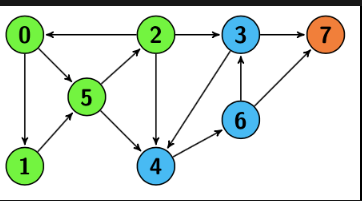

In [19]:
lista_adyacencia = {
    0: [1, 5],
    1: [5],
    2: [0,3,4],
    3: [7],
    4: [6],
    5: [2, 4],
    6: [3,7],
    7: []
}

In [20]:
bfs(lista_adyacencia, 0)

0
1
5
2
4
3
6
7


[0, 1, 5, 2, 4, 3, 6, 7]

## 2. ***Depth-first search (DFS)***

- Se parte de un nodo de inicio, al igual que en BFS, si el nodo no aparece en el recorrido, significa que no es alcanzable desde ese punto de partida

- Aqui se hace una **busqueda por profundidad**

- Desde el nodo inicial, se elige a un vecino y se trata de llegar lo mas lejos posible. Una vez se llega al final de la rama, se repite para el vecino siguente

![dfs](imgs/15_Depth-First-Search.gif)

### Implementacion Iterativa

- Muy similar a BFS, solo que esta vez usamos un *stack*

In [26]:
def dfs_iter(grafo, inicio: Nodo):
    
    # set con los nodos visitados
    visitados = set()

    # stack, recordar que es LIFO
    stack = [inicio]

    while len(stack) > 0:
        nodo = stack.pop()

        # comprobar si ya lo hemos visitado antes
        if nodo in visitados:
            continue

        # visitamos el nodo
        print(nodo)
        visitados.add(nodo)

        # agregamos los vecinos no visitados al stack
        for vecino in grafo[nodo]:
            if vecino not in visitados:
                stack.append(vecino)

    return list(visitados)

In [27]:
# ejemplo con el nodo de antes
print(lista_adyacencia)

{0: [1, 5], 1: [5], 2: [0, 3, 4], 3: [7], 4: [6], 5: [2, 4], 6: [3, 7], 7: []}


In [28]:
# ojo, como se retorna un set, este se ordena
# pero el orden en que se fueron visitando esta impreso hay
# esto es porque los nodos son numeros, si hubiesen sido letras, la cosa cambia
dfs_iter(lista_adyacencia, 0)

0
5
4
6
7
3
2
1


[0, 1, 2, 3, 4, 5, 6, 7]

### Implementacion Recursiva

- Se recorre cada nodo, y se llama recursivamente a los vecinos de ese nodo. Es necesario mantener una lista con los ya visitados a todo momento

In [29]:
def dfs_recur(grafo, nodo, visitados=None):
    visitados = visitados or set() # set() se asigna al partir

    # visitamos el nodo
    print(nodo)
    visitados.add(nodo)

    for vecino in grafo[nodo]:

        if vecino not in visitados:
            dfs_recur(grafo, vecino, visitados=visitados)

    return list(visitados)

In [30]:
dfs_recur(lista_adyacencia, 0)

0
1
5
2
3
7
4
6


[0, 1, 2, 3, 4, 5, 6, 7]

## Guardado del recorrido

Pueden haber momentos donde nos interesen los nodos entremedio de un nodo inicial y un nodo final. 

In [42]:
from collections import deque

# modificacion ligera
def bfs_camino_recorrido(grafo: Grafo, inicio: Nodo, final: Nodo):
    """
    Implementacion para un grafo representado como lista de adyacencia
    """

    # lista de los nodos ya visitados, esto es necesario para evitar que caigamos el loops en el grafo
    visitados = set()

    # incluimos una tupla que guarda lo que se ja recorrido
    queue = deque([(inicio, (inicio, ))]) # recordar que el queue es FIFO

    # mientras queden elementos en el queue, seguiremos recorriendo
    while len(queue) > 0:
        # elegimos el nodo a visitar
        # pero ademas lo que se recorrio para llegar a ese punto
        nodo, camino_recorrido = queue.popleft() 

        if nodo == final:
            return camino_recorrido
        
        # ahora agregamos los vecinos del nodo al queue
        for vecino in grafo[nodo]:
            if vecino not in visitados:
                visitados.add(vecino)
                # anadimos el vecino al queue y al camino recorrido
                queue.append((vecino, camino_recorrido + (vecino, )))

    return () # recorrido final


In [43]:
grafo = {
    "Calle1": ["Calle2", "Calle5"],
    "Calle2": ["Calle1", "Calle5"],
    "Calle3": ["Calle4", "Calle5"],
    "Calle4": ["Calle1"],
    "Calle5": ["Calle1", "Calle3", "Calle5"],
    "Calle6": ["Calle1", "Calle3"],
    "Calle7": ["Calle1"]
}

preguntas_recorrido = [
    ('Calle1', 'Calle1'),
    ('Calle2', 'Calle3'),
    ('Calle6', 'Calle2'),
    ('Calle2', 'Calle6'),
    ('Calle7', 'Calle4')
]
for inicio, fin in preguntas_recorrido:
    camino = bfs_camino_recorrido(grafo, inicio, fin)
    if len(camino):
        print(f"Para ir desde {inicio} a {fin} debes hacer los siguientes pasos: {' > '.join(camino)}")
    else:
        print(f"No es posible ir desde {inicio} a {fin}")


Para ir desde Calle1 a Calle1 debes hacer los siguientes pasos: Calle1
Para ir desde Calle2 a Calle3 debes hacer los siguientes pasos: Calle2 > Calle5 > Calle3
Para ir desde Calle6 a Calle2 debes hacer los siguientes pasos: Calle6 > Calle1 > Calle2
No es posible ir desde Calle2 a Calle6
Para ir desde Calle7 a Calle4 debes hacer los siguientes pasos: Calle7 > Calle1 > Calle5 > Calle3 > Calle4
